# EDA
##### Futuras mejoras
* Cambiar la matriz de correlaciones al no ser parte de las variables continuas.
No se puede aplicar la correlacion a las variables categoricas
Tabla de contingencia. Matriz de confución. Test de chi cuadrado


## Importación de librerías

In [14]:
from os import path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Constantes

Rutas usuales que se ocuparán en el notebook

In [2]:
# Salvar gráficos
SAVE_GRAF = True

# RUTAS
MAIN_PATH = path.join("..")

IMG_PATH = path.join(MAIN_PATH, "imagenes")
DATA_PATH = path.join(MAIN_PATH, "data")

WF_FOLDER_PATH = path.join(DATA_PATH, "wildfires_us")
WF_DATA_PATH = path.join(WF_FOLDER_PATH, "WILDFIRES_USA.csv")
WF_DATA_COLUMNS_PATH = path.join(WF_FOLDER_PATH, "WILDFIRES_USA_COLUMNS.csv")

# Tamaño de la imagen
my_figsize = (10, 5)

## Funciones auxiliares

Función que se ocupará para imprimir la información (número de filas y columnas) de un DataFrame.

In [3]:
def print_cantidad(dataframe):
    """Imprime la cantidad de datos que tiene el Data Frame.
    """
    msg_cantidad = "El dataset tiene una cantidad de {} datos y {} variables."
    print(msg_cantidad.format(dataframe.shape[0], dataframe.shape[1]))
    return None

Función que define el estilo de todos los gráficos

In [4]:
def estilo():
    """Define el estilo general de los gráficos.
    """
    # Configuraciones
    sns.set(
        context="notebook",
        style="whitegrid",
        palette="pastel",
        font_scale=1.3
    )

## Carga de datos

### Columnas a ocupar

Se escojen las columnas a ocupar dependiendo de la importancia que tenga. Se omiten algunas columnas tales como las que son para el ID, como el nombre que tuvo el incendio, o la columna que indica de dónde se obtuvo el incendio; pues no deberían de afectar a la predicción.

In [6]:
# Todas las columnas
columnas = str(pd.read_csv(WF_DATA_COLUMNS_PATH).columns[0]).split(",")

# Columnas que se ocuparán en el análisis
columnas_ocupadas = columnas.copy()

# Columnas que no se ocuparán
columnas_sin_ocupar = [x for x in columnas if x not in columnas_ocupadas]

# Columnas categoricas y numéricas
columnas_cat = [
    "FIRE_YEAR", 
    'STAT_CAUSE_DESCR', 
    'FIRE_SIZE_CLASS',
    'STATE',
    'DISC_MONTH',
    'DISC_DOW',
    'CONT_MONTH',
    'CONT_DOW',
]

columnas_num = [x for x in columnas_ocupadas if x not in columnas_cat]

In [7]:
columnas_num

['FIRE_SIZE',
 'LATITUDE',
 'LONGITUDE',
 'DISC_DATE_TIME',
 'DISC_TIME',
 'CONT_DATE_TIME',
 'CONT_TIME',
 'DT_FIRE']

### Carga de Datos

In [9]:
df = pd.read_csv(WF_DATA_PATH)

# Convertimos los datos que sean fechas en ese tipo de dato
df["DISC_DATE_TIME"] = pd.to_datetime(df["DISC_DATE_TIME"])
df["CONT_DATE_TIME"] = pd.to_datetime(df["CONT_DATE_TIME"])
# df["DT_FIRE"] = pd.to_timedelta(df["DT_FIRE"])
df["FIRE_YEAR"] = df["FIRE_YEAR"].map(str)

print_cantidad(df)

df.head()

El dataset tiene una cantidad de 890821 datos y 16 variables.


,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISC_DATE_TIME,DISC_MONTH,DISC_DOW,DISC_TIME,CONT_DATE_TIME,CONT_MONTH,CONT_DOW,CONT_TIME,DT_FIRE
0,1992,Miscellaneous,0.36,B,32.4410,-82.7018,GA,1992-01-01 00:01:00,January,Wednesday,0,1992-01-01 01:14:00,January,Wednesday,1,1.216667
1,1992,Miscellaneous,1.02,B,32.2009,-82.2967,GA,1992-01-01 00:05:00,January,Wednesday,0,1992-01-01 00:40:00,January,Wednesday,0,0.583333
2,1992,Miscellaneous,0.58,B,32.1325,-82.7610,GA,1992-01-01 00:10:00,January,Wednesday,0,1992-01-01 01:15:00,January,Wednesday,1,1.083333
3,1992,Children,10.14,C,32.0300,-83.9350,GA,1992-01-01 00:30:00,January,Wednesday,0,1992-01-01 02:20:00,January,Wednesday,2,1.833333
4,1992,Lightning,0.10,A,38.2050,-120.3350,CA,1992-01-01 01:30:00,January,Wednesday,1,1992-01-01 02:10:00,January,Wednesday,2,0.666667


In [10]:
causas = df["STAT_CAUSE_DESCR"].unique().tolist()
causas

['Miscellaneous',
 'Children',
 'Lightning',
 'Smoking',
 'Arson',
 'Equipment Use',
 'Debris Burning',
 'Campfire',
 'Railroad',
 'Missing/Undefined',
 'Powerline',
 'Fireworks',
 'Structure']

In [11]:
print(f"El número de causas son {len(causas)}.")

El número de causas son 13.


## Análisis de datos

### Grafico de causa vs número de incendios

In [15]:
# Función que servirá para graficar con el dataframe
def plot_barh(df, columna, save=SAVE_GRAF, n_datos=None, title=None, sort=True):
    """Plotea un gráfico de barras horizontales.
    Se especifica el dataframe y la columna con que se graficará
    """
    estilo()

    titulo = ("Número de incendios"
              + f" para la columna {columna}.") if title is None else title

    if n_datos is None:
        ax = df[columna].value_counts(sort=sort).plot(
            kind="barh",
            figsize=my_figsize,
        )
    else:
        ax = df[columna].value_counts(sort=sort).head(n=n_datos).plot(
            kind="barh",
            figsize=my_figsize,
        )

    ax.set_xlabel("Número de incendios")
    ax.set_ylabel(columna)
    ax.set_title(titulo)

    if save:
        plt.savefig(os.path.join(IMG_PATH, f"barh_{columna}.pdf"))

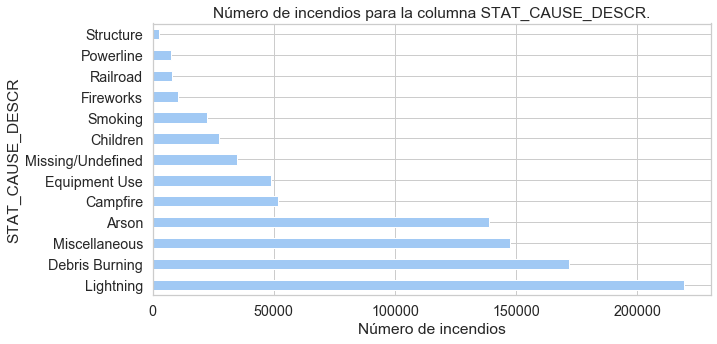

In [16]:
plot_barh(df, "STAT_CAUSE_DESCR")

Observamos que las principales causas de incendio son: `Lightning`, `Debris Burning`, `Miscellaneous` y `Arson`.

Estos, traducidos son: Relámpago, Quema de escombros, Misceláneo e Incendio provocado, respectivamente.

Dado que estas son las variables que queremos predecir, se tendrá que balancear el dataset para que no ocurra _overfitting_.



Dividiremos las causas en tres subgrupos dependiendo del número de veces que ocurre:
* En un grupo con número de causas baja.
* En un grupo con número de causas media.
* En un grupo con número de causas alta.

In [29]:
causas_l = ['Structure', 'Powerline', 'Railroad', 'Fireworks']
causas_m = ['Smoking', 'Children',
            'Missing/Undefined', 'Equipment Use', 'Campfire']
causas_h = ['Arson', 'Miscellaneous', 'Debris Burning', 'Lightning']

### Creación de nuevas categorías

Dado que no se quiere tener _overfitting_, se reparametrizará el dataframe y se asignarán nuevas categorías.

In [27]:
def new_category(cause):
    """Re-categoriza las causas que se tenían originalmente.
    """
    d_causes = {
        "Other": ['Miscellaneous',
                  'Missing/Undefined'],
        "Human": ['Children',
                  'Smoking',
                  'Equipment Use',
                  'Debris Burning',
                  'Campfire',
                  'Campfire',
                  'Railroad',
                  'Powerline',
                  'Fireworks',
                  'Structure'],
        "Natural": ['Lightning'],
        "Malicious": ['Arson']
    }

    for new_causes in d_causes:
        if cause in d_causes[new_causes]:
            return new_causes
    return None

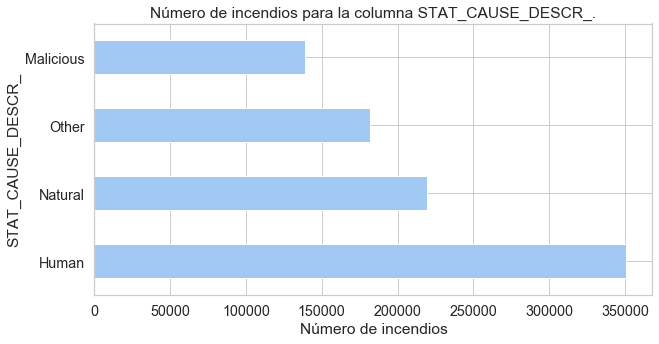

In [28]:
df_ = df.copy()
df_["STAT_CAUSE_DESCR_"] = df_.STAT_CAUSE_DESCR.map(new_category)
plot_barh(df_, "STAT_CAUSE_DESCR_")

De aquí observamos que el dataset se encuentra mejor equilibrado.

### Grafico del tamaño de incendio vs el número de incendios

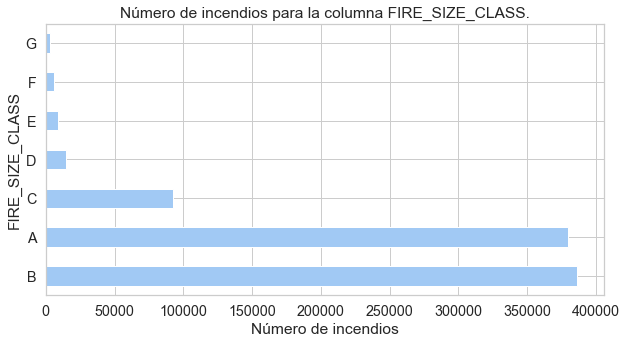

In [30]:
plot_barh(df, "FIRE_SIZE_CLASS")

Se observa que las principales clases de tamaños son: `B`, `A` y `C`.
    
Esto significa que la mayoría de incendios están entre los rangos 0.26-9.9, 0-0.25 y 10.0-99.9 acres respectivamente.

Un acre son 4046.86m2, si lo traducimos:
* `B`:1,052.18-40,063.91m2
* `A`:0.0-1,011.71m2
* `C`:40,468.60-404,281.31m2


### Gráfico del estado vs. el número de incendios

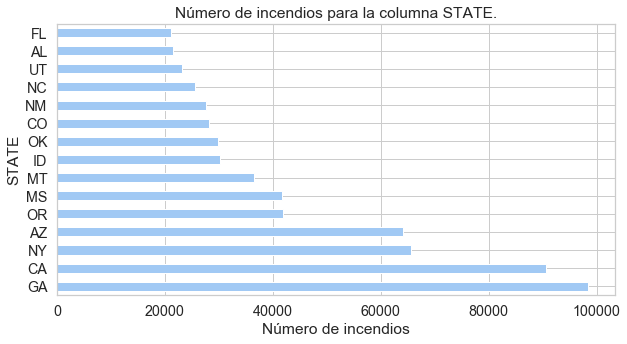

In [31]:
plot_barh(df, "STATE", n_datos=15)

Observamos que la mayoría de incendios se encuentran en Georgia, New York, California y Massachusetts.

### Gráfico de la distribución de incendios en el mapa

In [33]:
def graf_map(df, n_sample=2500):
    """Plotea un mapa de USA con sus incendios.
    """
    import folium
    import random

    # Inspiración: 
    # https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps

    state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/search_states.json"

    state_uneployment = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv"

    state_data = pd.read_csv(state_uneployment)

    m = folium.Map(location=[48, -102], zoom_start=3, width=800, height=500)

    lat_long = list(zip(df["LATITUDE"], df["LONGITUDE"]))

    random.seed(1314)
    for lat, long in random.sample(lat_long, 2500):
        folium.CircleMarker(
            [lat, long],
            color="red",
            fill=True,
            fill_opacity=0.2,
            radius=1,
        ).add_to(m)

    return m

In [35]:
graf_map(df, n_sample=4000)

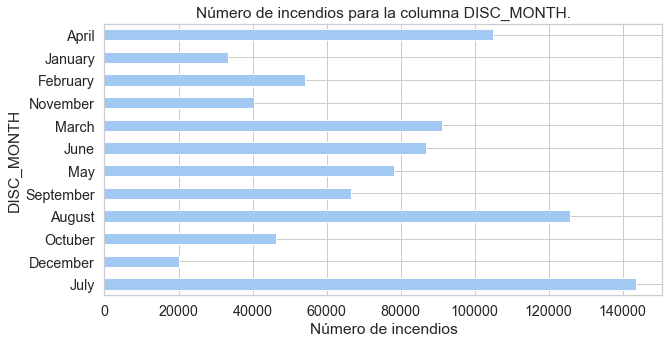

In [37]:
plot_barh(df, "DISC_MONTH", sort=True)

Observamos que la mayoría de incendios ocurren en los meses de julio, abril, marzo y agosto.

Esto se puede deber a que en esos meses ocurren ciertas festividades en USA, aunque se necesita de mayor investigación para afirmarlo.

### Analizar la causa con respecto a algún día de la semana

In [ ]:
def plot_barh_causa(causa):
    plot_barh(df[df["STAT_CAUSE_DESCR"]==causa],
              "DISC_DOW",
              title=(f"Número de incendios de causa '{causa}',"
                     " en días de semana.")
             )

In [ ]:
df.head()

In [ ]:
df["DISC_DOW"].unique().tolist()

In [ ]:
a = tuple([x for x in range(3)])
a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width,)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans,)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
def plot_stacked(col_label_x, causas_=None,
                 title=None, xlabel=None, ylabel=None
                 ):
    # parametros
    causas_ = causas.copy() if not causas_ else causas_

    # Obtenemos las etiquetas de una columna en particular
    labels = df[col_label_x].unique().tolist()

    # Diccionario indexado por label, 
    # con las filas que coincidan esa descripción
    d_x = {x: df[df[col_label_x] == x] for x in labels}

    # Cuenta del número de causas
    n_causa = {
        c: tuple([
            len(d_x[x][d_x[x].STAT_CAUSE_DESCR == c]) for x in labels
        ]) for c in causas_
    }
    
    bottoms = list()
    bottoms.append(tuple([0] * len(labels)))
    for i in range(len(causas_)):
        bottoms.append(tuple([
            i + j for i, j in zip(tuple(bottoms[i]), n_causa[causas_[i]])
        ]))

    # grafico

    stack_list = [
        plt.bar(labels, 
                n_causa[c], 
                bottom=b
               )[0] for c, b in zip(causas_, bottoms)
    ]

    title = (f"Número de incendios para la columna \n{col_label_x}"
             " y por causa") if title is None else title
    xlabel = (f"{col_label_x}") if xlabel is None else xlabel
    ylabel = ("Número de incendios") if ylabel is None else ylabel

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
#     ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.legend(stack_list, causas_)

    plt.xticks(rotation=60)
    plt.figure(figsize=my_figsize)
#     fig.set_size_inches(*my_figsize)

    plt.show()

    return None

In [ ]:
plot_stacked("FIRE_YEAR", causas_l[:])

In [ ]:
plot_stacked("FIRE_YEAR", causas_m)

In [ ]:
plot_stacked("FIRE_YEAR", causas_h)

In [ ]:
labels = ["Monday",
          "Tuesday",
          "Wednesday",
          "Thursday",
          "Friday",
          "Saturday",
          "Sunday"]

d_dow = {dow: df[df["DISC_DOW"] == dow] for dow in labels}

n_causa = {
    c: [
        len(d_dow[day][d_dow[day]["STAT_CAUSE_DESCR"]==c]) for day in labels
    ] for c in causas
}

def plot_dow_causa(title=None, xlabel=None, ylabel=None):
    # grafico
    fig, ax = plt.subplots()
    
    for c in causas:
        ax.bar(labels, n_causa[c], label=c)
        
    title = ("Número de incendios por día de semana"
             " y por causa") if title is None else title
    xlabel = ("Día de la semana") if xlabel is None else xlabel
    ylabel = ("Número de incendios") if ylabel is None else ylabel
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    plt.xticks(rotation=45)
    
    plt.show()
    
    return None

In [ ]:
plot_dow_causa()

In [ ]:
plot_barh_causa("Debris Burning")

Observamos que el número de incendios por la quema de escombros son más frecuentes los sábados.

Esto se puede explicar porque la gente suele acampar los fines de semana, provocando estos incendios.

In [ ]:
plot_barh_causa("Lightning")

Observamos que no hay diferencias significativas por la causa de relámpagos. Esto es lo intuitivo, pues es una causa natural y no humana.

In [ ]:
plot_barh_causa("Miscellaneous")

Observamos que ocurren más incendios los sábados, domingos y lunes de forma miscelánea. Esto se puede explicar de que las personas aprovehan los fines de semanas largos para ir a acampar.

In [ ]:
plot_barh_causa("Arson")

Obtenemos una tendencia similar a la causa miscélanea.

### Gráfico de número de incendios con respecto a la hora

In [ ]:
def hour_total(time):
    return time.hour + time.minute / 60 + time.second / 3600

In [ ]:
disc_time = df["DISC_DATE_TIME"].dt.time.map(hour_total)
# .value_counts(sort=False)
sns.distplot(disc_time, bins=100)

In [ ]:
df["DISC_TIME"].value_counts(sort=False).plot(
    kind="bar",
    figsize=my_figsize
)

plt.xticks(rotation=0)
plt.show()

Observamos que se forma una especie de campana, concentrada a las 14.

### Distribución con respecto al año

In [ ]:
df["FIRE_YEAR"].map(int).value_counts(sort=False).plot(
    kind="bar",
    figsize=my_figsize
)

plt.xticks(rotation=45)
plt.show()

### Distribución quen respecto al año fijada una causa

In [ ]:
def plot_year_causa(causa):
    
    df["FIRE_YEAR"].value_counts(sort=False).plot(
    kind="bar",
    figsize=my_figsize
)

Observamos que no son uniformes, con lo que es importante fijarse de la fecha.

### Matriz de correlaciones

In [ ]:
df_copy = df.copy()

le = preprocessing.LabelEncoder()
for col in columnas_cat:
    df_copy[col] = le.fit_transform(df_copy[col])
df_copy.head()

In [ ]:
from scipy import stats

cor_col = columnas_cat
N = len(cor_col)
mat_cor = np.zeros((N, N))

for i, cat_i in enumerate(cor_col):
    for j, cat_j in enumerate(cor_col):
        rho, _ = stats.spearmanr(df_copy[cat_i], df_copy[cat_j])
        mat_cor[i, j] = rho

mat_cor

In [ ]:
a = pd.DataFrame(mat_cor)
a.index = columnas_cat
a.columns = columnas_cat
a

In [ ]:
# corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(a, annot=True,
            vmin=-1, vmax=1, center=0,
            cmap="bwr", linewidths=1, ax=ax
           )

plt.xticks(rotation=80)
plt.show()

##### TODO
Mejorar esto. No se puede hacer matriz de correlaciones con datos categoricos.

Realizamos una copia del dataframe y rotulamos las variables categóricas.

In [ ]:
df_copy.head()

In [ ]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot=False,
            vmin=-1, vmax=1, center=0,
            cmap="bwr", linewidths=1, ax=ax
           )

plt.xticks(rotation=80)
plt.show()

Observamos que el el año del incendio tiene correlación con la causa del incendio y el estado. Curiosamente esta variable tiene correlación con la latitud. Puede ser que tenga esta correlación por su correlación con el estado.

La causa del incendio tiene correlación con la latitud y con el estado. Esto se puede deber a que la latitud tiene una alta correlación con el estado.

Observamos que el tamaño del incendio tiene correlación con el tiempo de contención.

In [19]:
causas

['Miscellaneous',
 'Children',
 'Lightning',
 'Smoking',
 'Arson',
 'Equipment Use',
 'Debris Burning',
 'Campfire',
 'Railroad',
 'Missing/Undefined',
 'Powerline',
 'Fireworks',
 'Structure']

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISC_DATE_TIME,DISC_MONTH,DISC_DOW,DISC_TIME,CONT_DATE_TIME,CONT_MONTH,CONT_DOW,CONT_TIME,DT_FIRE,STAT_CAUSE_DESCR_
0,1992,Miscellaneous,0.36,B,32.4410,-82.7018,GA,1992-01-01 00:01:00,January,Wednesday,0,1992-01-01 01:14:00,January,Wednesday,1,1.216667,Other
1,1992,Miscellaneous,1.02,B,32.2009,-82.2967,GA,1992-01-01 00:05:00,January,Wednesday,0,1992-01-01 00:40:00,January,Wednesday,0,0.583333,Other
2,1992,Miscellaneous,0.58,B,32.1325,-82.7610,GA,1992-01-01 00:10:00,January,Wednesday,0,1992-01-01 01:15:00,January,Wednesday,1,1.083333,Other
3,1992,Children,10.14,C,32.0300,-83.9350,GA,1992-01-01 00:30:00,January,Wednesday,0,1992-01-01 02:20:00,January,Wednesday,2,1.833333,Human
4,1992,Lightning,0.10,A,38.2050,-120.3350,CA,1992-01-01 01:30:00,January,Wednesday,1,1992-01-01 02:10:00,January,Wednesday,2,0.666667,Natural


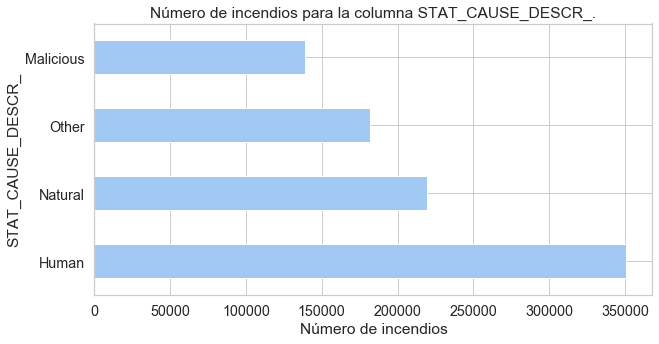

In [20]:
d = {"a":1, "b":2, "c":3}
for a in d:
    print(a)


a
b
c
